# Computer Hardware

- If you want to study data science and like coding, you need acquire a laptop that is fast enough and provides a comfortable learning experience. So, throughout the learning process, a good laptop is essential since it will not prevent you from trying out new and exciting things in the field of Data Science at any moment.

- A standard laptop may not be ideal for Machine Learning or AI work. So, while selecting a laptop, keep a few key elements in mind that will undoubtedly improve your studying experience and make you unstoppable!

- And one of the main parameter of computers which you must focus on is CPU. In this project you need to forecast performance of CPU which is characterized in terms of cycle time and memory capacity and so on.

# Dataset Overview

| Column Name                               | Summary                                        |
|-------------------------------------------|-----------------------------------------------------------------|
| `Seller Name`                             | Name of the seller of the computer                                    |
| `Model Name`                              | Computer model name                                          |
| `Machine Cycle Time in nanoseconds`       | Computer cycle time (in nanoseconds)                |
| `Minimum Main Memory in Kilobytes`        | Minimum main memory capacity of the computer (in Kilobytes) |
| `Maximum Main Memory in Kilobytes`        | Maximum main memory capacity of the computer (in Kilobytes)|
| `Cache Memory in Kilobytes`               | Cache memory capacity of the computer (in Kilobytes)    |
| `Minimum Channels in Units`               | Minimum number of channels of the computer (in units)             |
| `Maximum Channels in Units`               | Maximum number of channels of the computer (in units)            |
| `Published Relative Performance`          | Published relative performance value                           |
| `Estimated Relative Performance`          | Estimated relative performance value                              |




# ADVANCED FUNCTIONAL EXPLORATORY DATA ANALYSIS `(EDA)`

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [3]:
df = pd.read_csv('ComputerHardware.csv')

In [4]:
df

,Seller Name,Model Name,Machine Cycle Time in nanoseconds,Minimum Main Memory in Kilobytes,Maximum Main Memory in kilobytes,Cache Memory in Kilobytes,Minimum Channels in Units,Maximum Channels in Units,Published Relative Performance,Estimated Relative Performance
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290
...,...,...,...,...,...,...,...,...,...,...
203,sperry,80/8,124,1000,8000,0,1,8,42,37
204,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
205,sratus,32,125,2000,8000,0,2,14,52,41
206,wang,vs-100,480,512,8000,32,0,0,67,47


In [5]:
def check_df(dataframe, head=5):
    print("############## Shape #############")
    print(dataframe.shape)
    print("############## Types #############")
    print(dataframe.dtypes)
    print("############## Tail #############")
    print(dataframe.tail(head))
    print("############## NA #############")
    print(dataframe.isnull().sum())
    print("############## Quantiles #############")
    print(dataframe.describe([0,0.05,0.50,0.95,0.99,1]).T)

In [6]:
check_df(df)

############## Shape #############
(208, 10)
############## Types #############
Seller Name                          object
Model Name                           object
Machine Cycle Time in nanoseconds     int64
Minimum Main Memory in Kilobytes      int64
Maximum Main Memory in kilobytes      int64
Cache Memory in Kilobytes             int64
Minimum Channels in Units             int64
Maximum Channels in Units             int64
Published Relative Performance        int64
Estimated Relative Performance        int64
dtype: object
############## Tail #############
    Seller Name  ... Estimated Relative Performance
203      sperry  ...                             37
204      sperry  ...                             50
205      sratus  ...                             41
206        wang  ...                             47
207        wang  ...                             25

[5 rows x 10 columns]
############## NA #############
Seller Name                          0
Model Name                

# Feature Enginering

In [12]:
# Feature engineering: Adding frames of features
df['Cycle Time Squared'] = df['Machine Cycle Time in nanoseconds'] ** 2
df['Memory Squared'] = df['Minimum Main Memory in Kilobytes'] ** 2

# Show new features
print(df.head())


  Seller Name Model Name  ...  Cycle Time Squared  Memory Squared
0      amdahl     470v/7  ...                 841        64000000
1      amdahl    470v/7a  ...                 841        64000000
2      amdahl    470v/7b  ...                 841        64000000
3      amdahl    470v/7c  ...                 841        64000000
4      amdahl     470v/b  ...                 676        64000000

[5 rows x 12 columns]


In [14]:
# Outlier analysis
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Show outliers
outliers = detect_outliers('Machine Cycle Time in nanoseconds')
print(outliers)

    Seller Name     Model Name  ...  Cycle Time Squared  Memory Squared
45          dec     microvax-1  ...              656100          262144
46          dec     vax:11/730  ...              656100         1000000
49           dg  eclipse:c/350  ...              490000          147456
50           dg  eclipse:m/600  ...              490000           65536
56    formation      f4000/100  ...              640000           65536
57    formation      f4000/200  ...              640000           65536
58    formation    f4000/200ap  ...              640000           65536
59    formation      f4000/300  ...              640000           65536
60    formation    f4000/300ap  ...              640000           65536
101         ibm           38/3  ...             1210000          262144
102         ibm           38/4  ...             1210000          589824
103         ibm           38/5  ...              360000          589824
106         ibm           4321  ...              810000         

# Model Training & Prediction

In [15]:
from sklearn.tree import DecisionTreeRegressor

# Let's build the decision tree model
tree_model = DecisionTreeRegressor(random_state=42)

# Evaluating the performance of the decision tree model with cross-validation
tree_cv_scores = cross_val_score(tree_model, X, y, cv=5)
print("Decision Trees Cross-Validation R-square (R2) Scores:", tree_cv_scores)
print("Decision Trees Mean R-square (R2) Value:", np.mean(tree_cv_scores))


Decision Trees Cross-Validation R-square (R2) Scores: [0.94083788 0.73510486 0.50183175 0.85792693 0.40454952]
Decision Trees Mean R-square (R2) Value: 0.6880501911907609


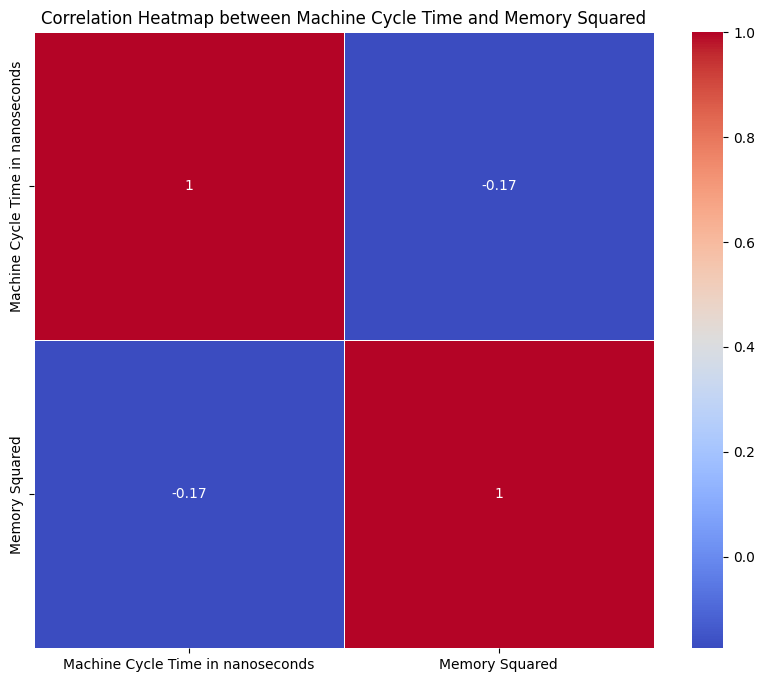

In [18]:
# Heatmap
plt.figure(figsize=(10, 8))
heatmap_data = df[['Machine Cycle Time in nanoseconds', 'Memory Squared']]
heatmap = sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap between Machine Cycle Time and Memory Squared')
plt.show()


     Actual Values  Predicted Values
161             47         70.000000
15              23         22.500000
73              25         37.500000
96             220        242.000000
166            142        196.000000
9               23         22.666667
100             35         19.000000
135             88        116.000000
18             124         45.000000
148             48        115.000000
171             67         76.000000
30             102        102.000000
155            603        361.000000
180             19         22.000000
125             44        116.000000
197            919        978.000000
164             80        135.000000
190            275        242.000000
84              28         98.142857
75              27         37.500000

Mean Square Error (MSE): 3152.7683430515062


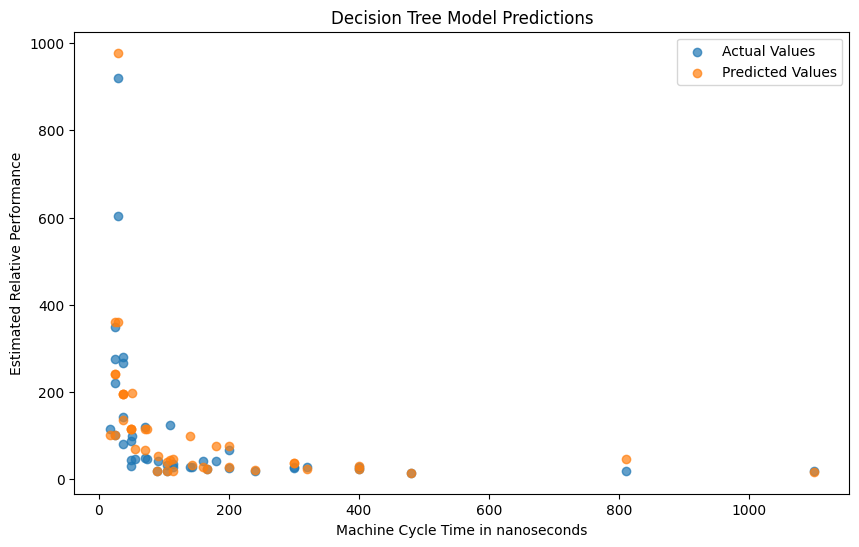

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Separating data into independent (X) and dependent (y) variables
X = df[['Machine Cycle Time in nanoseconds', 'Memory Squared']]
y = df['Estimated Relative Performance']

# Creating training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the decision tree model
tree_model.fit(X_train, y_train)

# Forecasting on the test data set
y_pred = tree_model.predict(X_test)

# Create a DataFrame containing predicted and actual values
results_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})

# Displaying the first 20 observations
print(results_df.head(20))

# Calculate the mean square error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Square Error (MSE): {mse}")

# Creating an image
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Machine Cycle Time in nanoseconds'], y_test, label='Actual Values', alpha=0.7)
plt.scatter(X_test['Machine Cycle Time in nanoseconds'], y_pred, label='Predicted Values', alpha=0.7)
plt.xlabel('Machine Cycle Time in nanoseconds')
plt.ylabel('Estimated Relative Performance')
plt.title('Decision Tree Model Predictions')
plt.legend()
plt.show()
